In [1]:
#View contents of CSV file
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('fortune_500_companies.csv')

# Display the dataframe
df

,name,rank,year,industry,sector,headquarters_state,headquarters_city,market_value_mil,revenue_mil,profit_mil,asset_mil,employees,founder_is_ceo,female_ceo,newcomer_to_fortune_500,global_500
0,Walmart,1,2023,General Merchandisers,Retailing,AR,Bentonville,397475.0,611289.0,11680.0,243197.0,2100000.0,no,no,no,yes
1,Amazon,2,2023,Internet Services and Retailing,Retailing,WA,Seattle,1058440.0,513983.0,2722.0,462675.0,1541000.0,no,no,no,yes
2,Exxon Mobil,3,2023,Petroleum Refining,Energy,TX,Irving,446424.0,413680.0,55740.0,369067.0,62000.0,no,no,no,yes
3,Apple,4,2023,"Computers, Office Equipment",Technology,CA,Cupertino,2609039.0,394328.0,99803.0,352755.0,164000.0,no,no,no,yes
4,UnitedHealth Group,5,2023,Health Care: Insurance and Managed Care,Health Care,MN,Minnetonka,440854.0,324162.0,20120.0,245705.0,400000.0,no,no,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,KKR,496,2023,Securities,Financials,NY,New York,45225.0,7273.0,841.0,277077.0,4150.0,no,no,no,no
496,Equinix,497,2023,Real Estate,Financials,CA,Redwood City,66873.0,7263.0,704.0,30311.0,12097.0,no,no,no,no
497,Sonoco Products,498,2023,"Packaging, Containers",Materials,SC,Hartsville,5975.0,7251.0,466.0,7053.0,22000.0,no,no,yes,no
498,ServiceNow,499,2023,Computer Software,Technology,CA,Santa Clara,94338.0,7245.0,325.0,13299.0,20433.0,no,no,yes,no


In [2]:
import pandas as pd
import sqlite3

# Load CSV file
file_path = "/work/fortune_500_companies.csv"  
df = pd.read_csv(file_path)

# Create SQLite in-memory database
conn = sqlite3.connect(":memory:")
df.to_sql("companies", conn, index=False, if_exists="replace")

# Execute the SQL query
query = """
SELECT industry, COUNT(*) AS company_count
FROM companies
GROUP BY industry
ORDER BY company_count DESC;
"""

# Run the query and display results
industry_distribution = pd.read_sql_query(query, conn)

# Show table output
from IPython.display import display
display(industry_distribution)

# Close the connection
conn.close()


,industry,company_count
0,Utilities: Gas and Electric,23
1,Commercial Banks,21
2,Specialty Retailers: Other,19
3,"Mining, Crude-Oil Production",16
4,Insurance: Property and Casualty (Stock),16
...,...,...
66,"Advertising, Marketing",2
67,Transportation Equipment,1
68,"Publishing, Printing",1
69,Forest and Paper Products,1


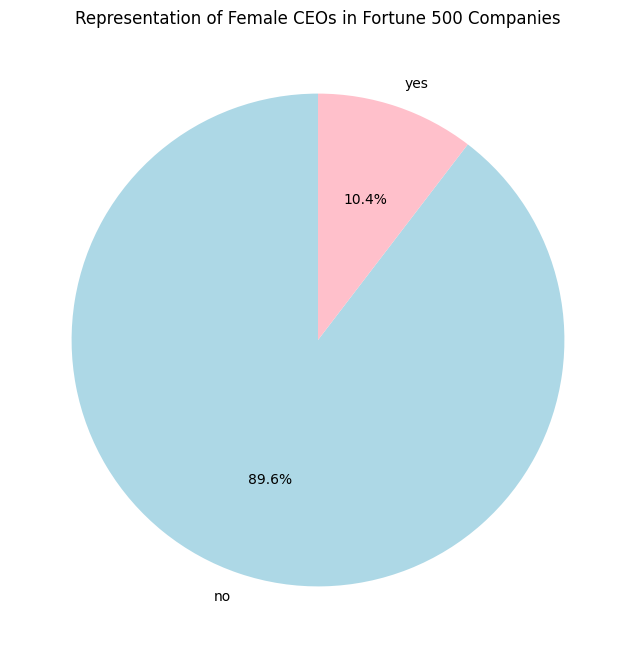

In [17]:
import matplotlib.pyplot as plt

# Count the number of companies with female CEOs and without
female_ceo_counts = df['female_ceo'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(female_ceo_counts, labels=female_ceo_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
plt.title('Representation of Female CEOs in Fortune 500 Companies')
plt.show()

The pie chart displays the proportion of Fortune 500 companies led by female CEOs versus those not led by female CEOs.

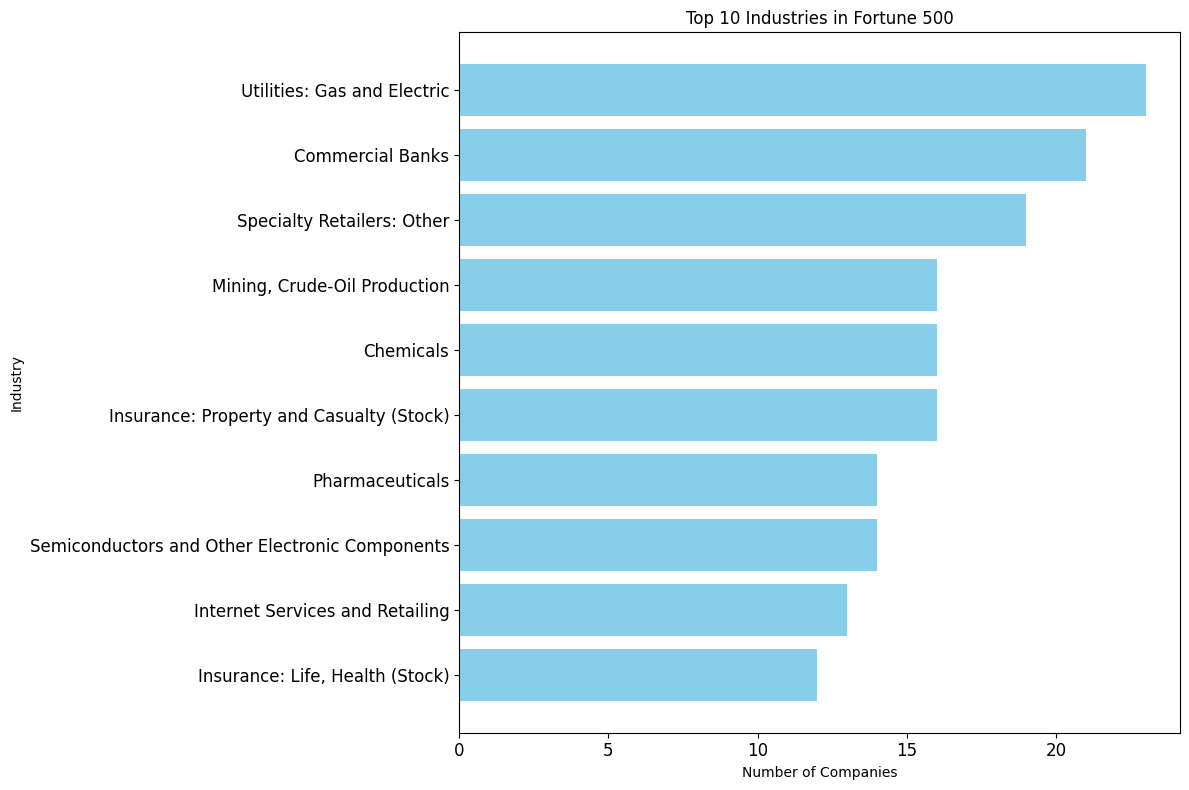

In [9]:
# Import modules for plotting
import matplotlib.pyplot as plt

# Select the top 10 industries with the highest company count
industry_distribution_top10 = industry_distribution.nlargest(10, 'company_count')

# Sort for better visualization
industry_distribution_top10 = industry_distribution_top10.sort_values(by='company_count', ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(12, 8))  # Adjusted figure size for spacing
plt.barh(industry_distribution_top10['industry'], industry_distribution_top10['company_count'], color='skyblue')

# Add labels and title
plt.xlabel('Number of Companies')
plt.ylabel('Industry')
plt.title('Top 10 Industries in Fortune 500')

# Improve spacing
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the chart
plt.show()


In [11]:
import plotly.express as px

# Count the number of companies headquartered in each state
state_distribution = df['headquarters_state'].value_counts().reset_index()
state_distribution.columns = ['state', 'company_count']

# Plot the choropleth map
fig = px.choropleth(
    state_distribution,
    locations='state',
    locationmode='USA-states',
    color='company_count',
    color_continuous_scale='Blues',
    scope='usa',
    title='Geographic Distribution of Fortune 500 Headquarters by State'
)

fig.show()

The choropleth map visualizes the geographic distribution of Fortune 500 company headquarters across U.S. states.

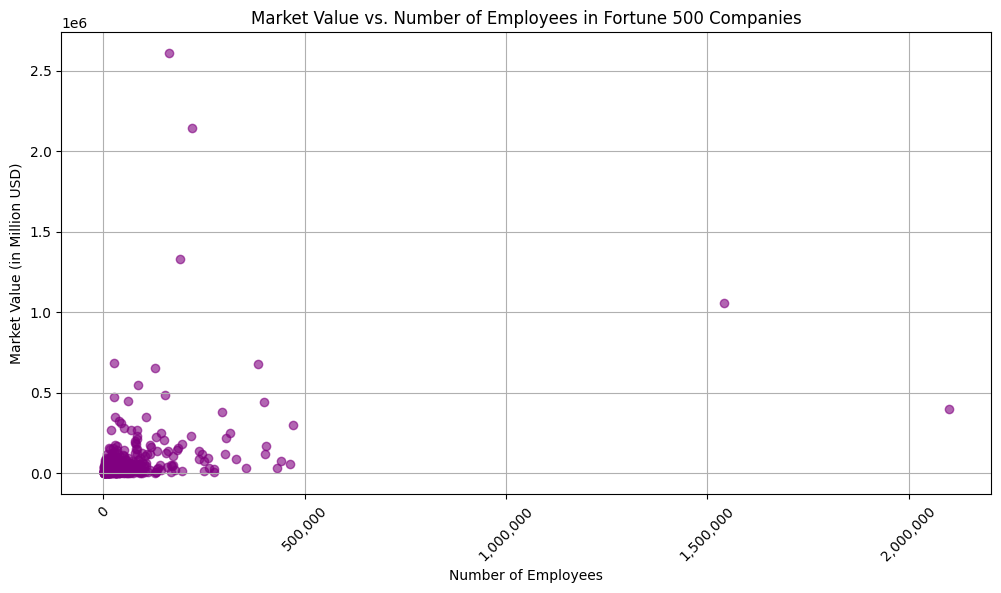

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Plot scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['employees'], df['market_value_mil'], alpha=0.6, color='purple')

# Add labels and title
plt.xlabel('Number of Employees')
plt.ylabel('Market Value (in Million USD)')
plt.title('Market Value vs. Number of Employees in Fortune 500 Companies')

# Format x-axis to show whole numbers with thousands separator
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Improve readability
plt.grid(True)
plt.xticks(rotation=45, fontsize=10)  # Rotate for better visibility if needed
plt.yticks(fontsize=10)

# Show the plot
plt.show()

The scatter plot visualizes the relationship between the number of employees and the market value of Fortune 500 companies.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1d3b5ce6-fae0-4688-bd5d-780150047ef6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>